# Pandas

 > [Pandas教程](https://www.runoob.com/pandas/)

## Pandas股票数据分析

 > [Pandas 股票数据分析](https://www.runoob.com/pandas/pandas-stock.html)

In [66]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# 获取茅台（600519.SS）的股票数据，日期范围从 2020-01-01 到 2021-01-01
stock_data = yf.download('600519.SS', start='2020-01-01', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [68]:
# 查看数据的前几行
print(stock_data.head())

Price             Close         High          Low         Open    Volume
Ticker        600519.SS    600519.SS    600519.SS    600519.SS 600519.SS
Date                                                                    
2020-01-02  1015.227600  1028.758031  1002.649559  1013.430737  14809916
2020-01-03   969.012512  1003.548173   967.521085  1003.548173  13031878
2020-01-06   968.500183   981.895828   958.896003   962.094362   6341478
2020-01-07   983.360352   987.376314   967.071782   968.060035   4785359
2020-01-08   977.619446   977.619446   977.619446   977.619446   2500825


In [69]:
# 检查数据类型
print(type(stock_data))

<class 'pandas.core.frame.DataFrame'>


In [70]:
# 检查缺失值
print(stock_data.isnull().sum())

Price   Ticker   
Close   600519.SS    0
High    600519.SS    0
Low     600519.SS    0
Open    600519.SS    0
Volume  600519.SS    0
dtype: int64


In [71]:
# 使用前向填充替换缺失值
stock_data.ffill(inplace=True)
# 或者使用后向填充
# stock_data.bfill(inplace=True)

In [72]:
# 检查缺失值是否已经处理
print(stock_data.isnull().sum())

Price   Ticker   
Close   600519.SS    0
High    600519.SS    0
Low     600519.SS    0
Open    600519.SS    0
Volume  600519.SS    0
dtype: int64


In [73]:
# 删除"Volume"列
stock_data_cleaned = stock_data.drop(columns=['Volume'])
print(stock_data_cleaned.head())

Price             Close         High          Low         Open
Ticker        600519.SS    600519.SS    600519.SS    600519.SS
Date                                                          
2020-01-02  1015.227600  1028.758031  1002.649559  1013.430737
2020-01-03   969.012512  1003.548173   967.521085  1003.548173
2020-01-06   968.500183   981.895828   958.896003   962.094362
2020-01-07   983.360352   987.376314   967.071782   968.060035
2020-01-08   977.619446   977.619446   977.619446   977.619446


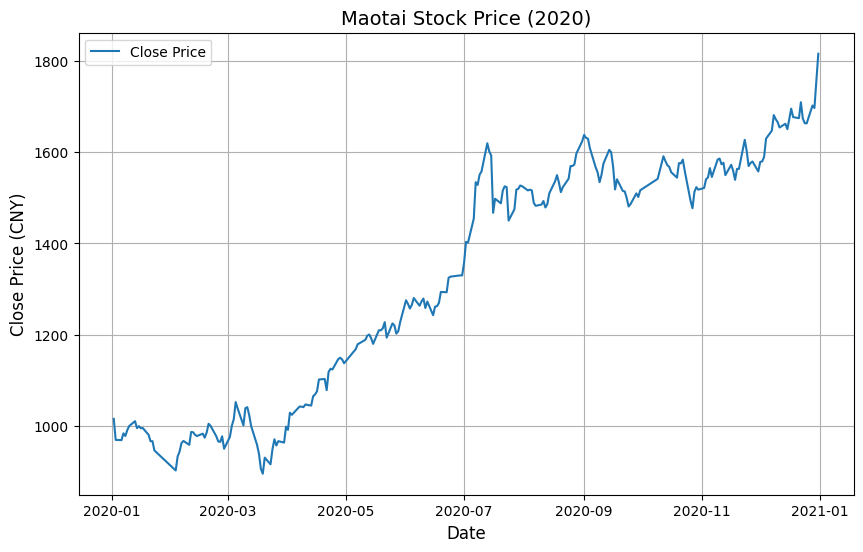

In [74]:
# 绘制茅台收盘价曲线
plt.figure(figsize=(10, 6))
plt.plot(stock_data_cleaned['Close'], label='Close Price')
plt.title('Maotai Stock Price (2020)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (CNY)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

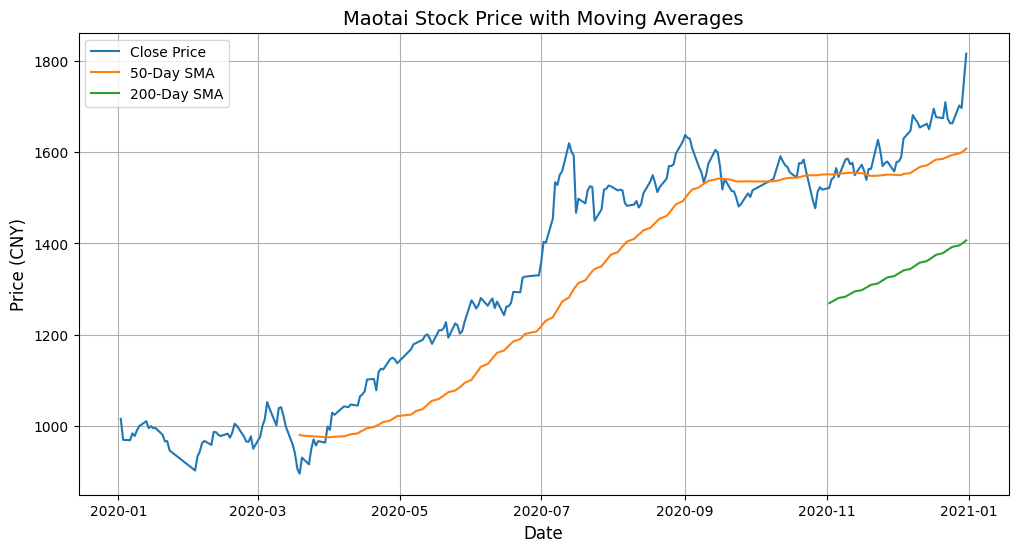

In [75]:
# 计算 50 日和 200 日的移动平均线
stock_data_cleaned['SMA_50'] = stock_data_cleaned['Close'].rolling(window=50).mean()
stock_data_cleaned['SMA_200'] = stock_data_cleaned['Close'].rolling(window=200).mean()

# 绘制收盘价和移动平均线
plt.figure(figsize=(12, 6))
plt.plot(stock_data_cleaned['Close'], label='Close Price')
plt.plot(stock_data_cleaned['SMA_50'], label='50-Day SMA')
plt.plot(stock_data_cleaned['SMA_200'], label='200-Day SMA')
plt.title('Maotai Stock Price with Moving Averages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (CNY)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

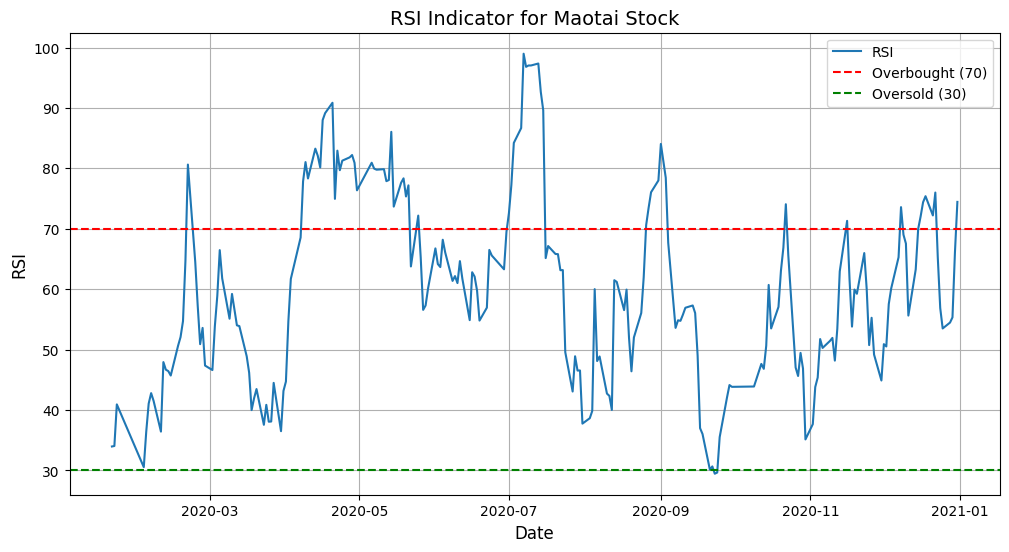

In [76]:
# 计算 RSI 指标
delta = stock_data_cleaned['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# 计算平均收益和损失
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# 计算相对强弱指数 RSI
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# 添加 RSI 到数据中
stock_data_cleaned['RSI'] = rsi

# 绘制 RSI 曲线
plt.figure(figsize=(12, 6))
plt.plot(stock_data_cleaned['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('RSI Indicator for Maotai Stock', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('RSI', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

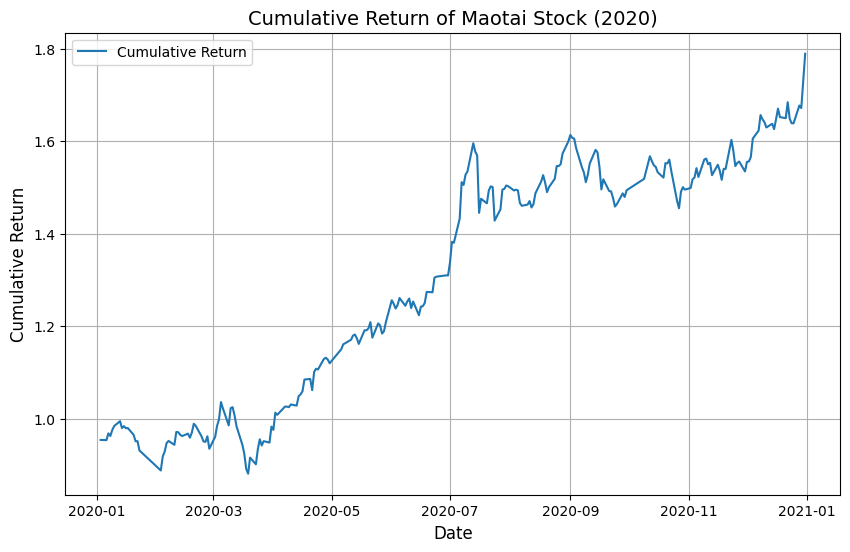

In [77]:
# 计算日收益率
stock_data_cleaned['Daily_Return'] = stock_data_cleaned['Close'].pct_change()

# 计算累计收益率
stock_data_cleaned['Cumulative_Return'] = (1 + stock_data_cleaned['Daily_Return']).cumprod()

# 绘制累计收益率
plt.figure(figsize=(10, 6))
plt.plot(stock_data_cleaned['Cumulative_Return'], label='Cumulative Return')
plt.title('Cumulative Return of Maotai Stock (2020)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [78]:
# 计算日收益率的标准差（波动率）
volatility = stock_data_cleaned['Daily_Return'].std()

# 显示波动率
print(f"Daily Volatility: {volatility:.4f}")

Daily Volatility: 0.0181
